<a href="https://colab.research.google.com/github/hmyrcmn/MachinaLearning/blob/main/yatasH%C4%B1sseAnaliz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = pd.read_csv('YATAS.csv')


In [4]:
data.head()

,TRADE DATE,INSTRUMENT SERIES CODE,INSTRUMENT NAME,MARKET SEGMENT,MARKET,INSTRUMENT TYPE,INSTRUMENT CLASS,MARKET MAKER,BIST 100 INDEX,BIST 30 INDEX,...,SHORT SALE VWAP,TRADED VALUE OF SHORT SALE TRADES,TRADED VOLUME OF SHORT SALE TRADES,NUMBER OF CONTRACTS OF SHORT SALE TRADES,LOWEST TRADE REPORT PRICE,HIGHEST TRADE REPORT PRICE,TRADE REPORT VWAP,TRADE REPORT TRADED VALUE,TRADE REPORT TRADED VOLUME,NUMBER OF TRADE REPORTS
0,2015-11-30,YATAS,YATAS YATAK,N,MSPOT,MSPOTEQT,MSPOTEQTYATAS,0,0,0,...,0.000,0.0,0,0,0.0,0.0,0.0,0.0,0,0
1,2015-12-01,YATAS,YATAS YATAK,N,MSPOT,MSPOTEQT,MSPOTEQTYATAS,0,0,0,...,2.216,27700.0,12500,15,0.0,0.0,0.0,0.0,0,0
2,2015-12-02,YATAS,YATAS YATAK,N,MSPOT,MSPOTEQT,MSPOTEQTYATAS,0,0,0,...,0.000,0.0,0,0,0.0,0.0,0.0,0.0,0,0
3,2015-12-03,YATAS,YATAS,N,MSPOT,MSPOTEQT,MSPOTEQTYATAS,0,0,0,...,2.230,22300.0,10000,1,0.0,0.0,0.0,0.0,0,0
4,2015-12-04,YATAS,YATAS,N,MSPOT,MSPOTEQT,MSPOTEQTYATAS,0,0,0,...,2.230,11150.0,5000,1,0.0,0.0,0.0,0.0,0,0


In [6]:
closing_price = data["CLOSING PRICE"]


In [7]:
data["TRADE DATE"] = pd.to_datetime(data["TRADE DATE"])
data.set_index("TRADE DATE", inplace=True)


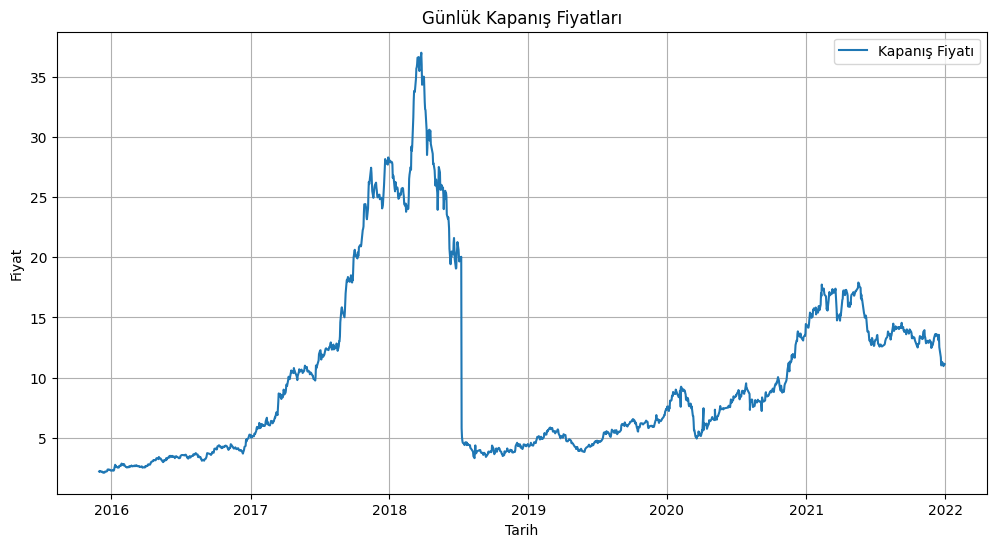

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, closing_price, label="Kapanış Fiyatı")
plt.title("Günlük Kapanış Fiyatları")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(True)
plt.show()

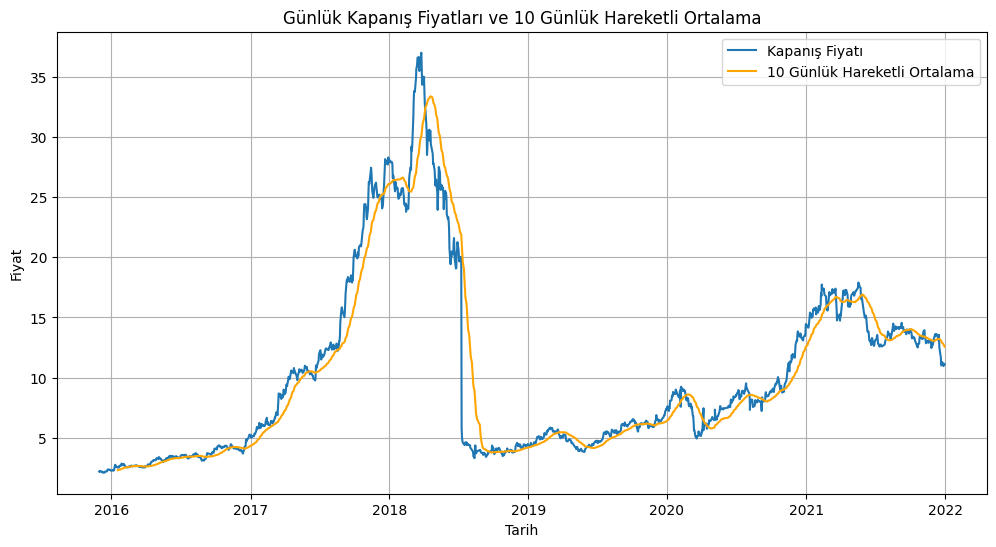

In [22]:
# 20 günlük hareketli ortalama hesaplama
moving_average = closing_price.rolling(window=35).mean()

# Hareketli ortalama çizgisini grafiğe ekleyin
plt.figure(figsize=(12, 6))
plt.plot(data.index, closing_price, label="Kapanış Fiyatı")
plt.plot(data.index, moving_average, label="10 Günlük Hareketli Ortalama", color="orange")
plt.title("Günlük Kapanış Fiyatları ve 10 Günlük Hareketli Ortalama")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(True)
plt.show()


In [32]:
highTrade=closing_price > moving_average
lowTrade=closing_price <= moving_average



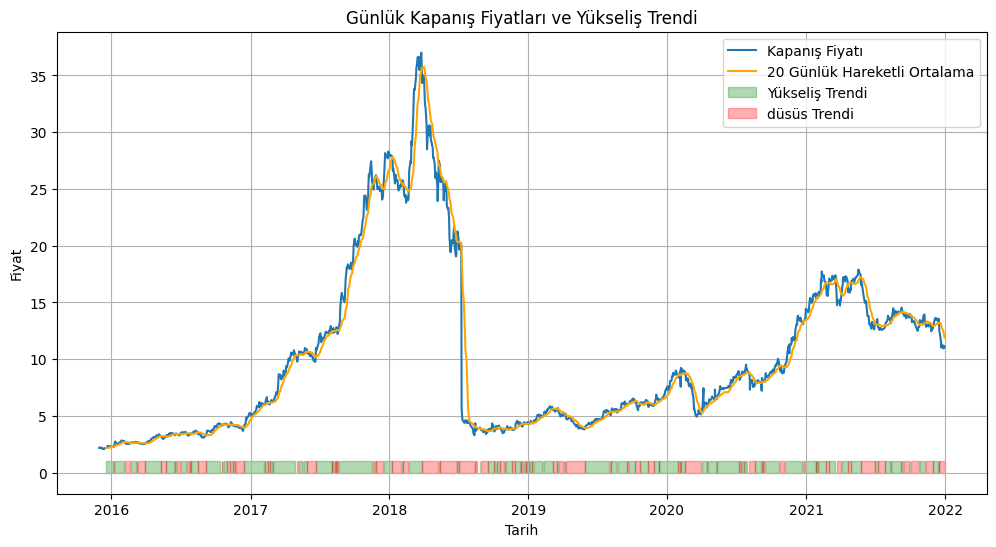

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, closing_price, label="Kapanış Fiyatı")
plt.plot(data.index, moving_average, label="20 Günlük Hareketli Ortalama", color="orange")
plt.fill_between(data.index, 0, 1, where=highTrade, alpha=0.3, color="green", label="Yükseliş Trendi")
plt.fill_between(data.index, 0, 1, where=lowTrade, alpha=0.3, color="red", label="düsüs Trendi")

plt.title("Günlük Kapanış Fiyatları ve Yükseliş Trendi")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(True)
plt.show()

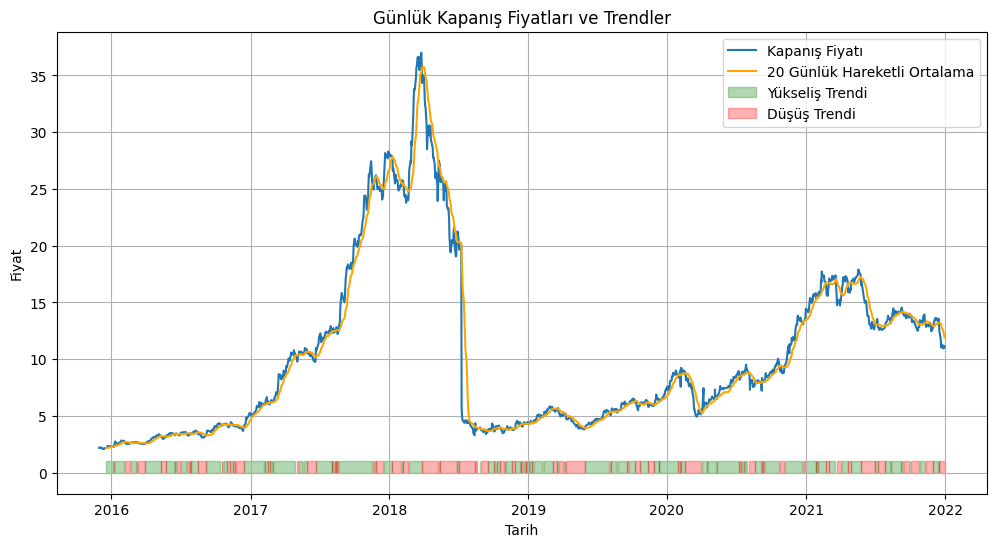

In [37]:

highTrade = closing_price > moving_average
lowTrade = closing_price < moving_average

plt.figure(figsize=(12, 6))
plt.plot(data.index, closing_price, label="Kapanış Fiyatı")
plt.plot(data.index, moving_average, label="20 Günlük Hareketli Ortalama", color="orange")

# Yükseliş ve düşüş trendlerini görselleştirme
plt.fill_between(data.index, 0, 1, where=highTrade, alpha=0.3, color="green", label="Yükseliş Trendi")
plt.fill_between(data.index, 0, 1, where=lowTrade, alpha=0.3, color="red", label="Düşüş Trendi")

plt.title("Günlük Kapanış Fiyatları ve Trendler")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(True)
plt.show()


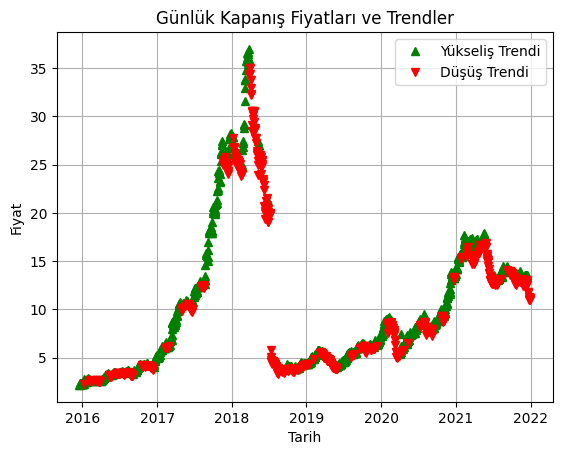

In [41]:
# Yükseliş trendini çizme
plt.plot(data.index[highTrade], closing_price[highTrade], 'g^', label="Yükseliş Trendi")

# Düşüş trendini çizme
plt.plot(data.index[lowTrade], closing_price[lowTrade], 'rv', label="Düşüş Trendi")

plt.title("Günlük Kapanış Fiyatları ve Trendler")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
import numpy as np
import statsmodels.api as sm


# R-kare değerini hesaplama
X = sm.add_constant(np.arange(len(data)))  # Bağımsız değişken
Y = closing_price.values  # Bağımlı değişken

model = sm.OLS(Y, X).fit()
r_squared = model.rsquared

# R-kare değerini yazdırma
print("R-kare Değeri:", r_squared)

R-kare Değeri: 0.03933871633488195


<Figure size 1200x600 with 0 Axes>

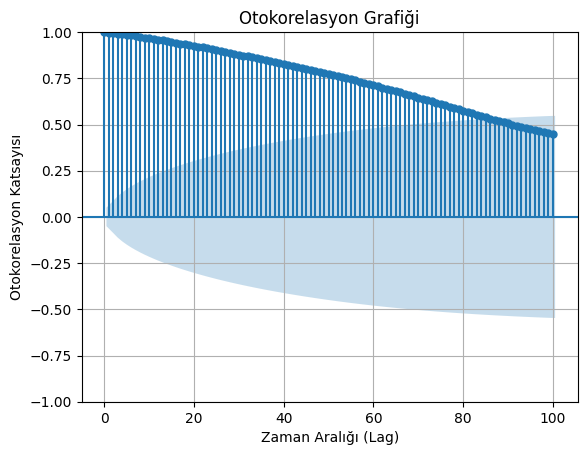

In [46]:
from statsmodels.graphics.tsaplots import plot_acf


plt.figure(figsize=(12, 6))
plot_acf(closing_price, lags=100)
plt.title("Otokorelasyon Grafiği")
plt.xlabel("Zaman Aralığı (Lag)")
plt.ylabel("Otokorelasyon Katsayısı")
plt.grid(True)
plt.show()

In [54]:

import statsmodels.api as sm

# detaylı zaman gerektiren veriler için uygun değil

# Zamanı bağımsız değişken olarak kullanın
X = np.arange(len(data))
X = sm.add_constant(X)  # Sabit terimi ekleyin

# Bağımlı değişken olarak kapanış fiyatlarını kullanın
Y = closing_price.values

# Doğrusal regresyon modelini oluşturun
model = sm.OLS(Y, X).fit()

# Eğim ve yükseklik (kesme noktası) değerlerini alın
slope = model.params[1]

# Eğilimi yazdırma
if slope > 0:
    print("Yükseliş Trendi")
elif slope < 0:
    print("Düşüş Trendi")
else:
    print("Yatay Trend")

Yükseliş Trendi
